In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading Dataset
df = pd.read_csv('bronze.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1930-12-08T08:01:02.000Z,23.261,120.277,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1930-12-03T18:51:47.000Z,18.233,96.298,10.0,7.4,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1930-12-02T07:01:30.000Z,25.854,98.356,35.0,6.2,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1930-11-28T07:32:56.000Z,18.779,-106.767,15.0,6.3,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1930-11-25T19:02:53.000Z,35.050,139.129,15.0,6.9,mw,NaN,NaN,NaN,NaN,...,2015-05-13T18:52:43.000Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Exploratory Data Analysis

In [4]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
count,797046.000000,797046.000000,797041.000000,797046.000000,421658.000000,470629.000000,202838.000000,614095.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,19.038314,-12.911692,53.726903,3.884296,33.170883,141.002356,1.757801,0.763249,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,29.219884,118.010192,99.510254,0.911611,55.796692,81.447357,3.734481,0.477974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,-84.422000,-179.999000,-4.900000,2.500000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,-4.727000,-118.086000,10.000000,3.000000,8.000000,75.000000,0.082880,0.420000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,29.826000,-52.385000,23.000000,4.000000,16.000000,125.000000,0.583000,0.810000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,39.405000,120.892000,45.620000,4.600000,35.000000,195.900000,1.973000,1.070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,87.221000,180.000000,735.800000,9.500000,934.000000,360.000000,127.420000,69.320000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isna().sum()

time                    0
latitude                0
longitude               0
depth                   5
mag                     0
magType               106
nst                375388
gap                326417
dmin               594208
rms                182951
net                     0
id                      0
updated                 0
place              797046
type               797046
horizontalError    797046
depthError         797046
magError           797046
magNst             797046
status             797046
locationSource     797046
magSource          797046
dtype: int64

In [6]:
# Considering Relevant Columns Only

rel_cols = ['time', 'latitude', 'longitude', 'mag', 'depth']
data = df[rel_cols]
data

,time,latitude,longitude,mag,depth
0,1930-12-08T08:01:02.000Z,23.2610,120.2770,6.3,15.00
1,1930-12-03T18:51:47.000Z,18.2330,96.2980,7.4,10.00
2,1930-12-02T07:01:30.000Z,25.8540,98.3560,6.2,35.00
3,1930-11-28T07:32:56.000Z,18.7790,-106.7670,6.3,15.00
4,1930-11-25T19:02:53.000Z,35.0500,139.1290,6.9,15.00
...,...,...,...,...,...
797041,2018-09-01T01:14:38.230Z,-30.4830,-177.9279,4.3,43.90
797042,2018-09-01T01:07:59.120Z,-10.7558,124.3621,4.0,10.00
797043,2018-09-01T01:00:13.810Z,-5.5167,147.1735,4.6,217.56
797044,2018-09-01T00:27:11.440Z,46.8819,155.6566,4.3,10.00


In [7]:
# Considering Asia only

data = data[data['longitude']>-25]
data = data[data['longitude']< 170]
data = data[-10 < data['latitude']]
data = data[data['latitude']< 80]
data

,time,latitude,longitude,mag,depth
0,1930-12-08T08:01:02.000Z,23.2610,120.2770,6.3,15.00
1,1930-12-03T18:51:47.000Z,18.2330,96.2980,7.4,10.00
2,1930-12-02T07:01:30.000Z,25.8540,98.3560,6.2,35.00
4,1930-11-25T19:02:53.000Z,35.0500,139.1290,6.9,15.00
5,1930-11-10T13:44:15.000Z,-2.3350,138.7840,6.9,30.00
...,...,...,...,...,...
797021,2018-09-01T07:24:34.520Z,32.7210,140.4162,4.4,126.83
797023,2018-09-01T07:11:51.930Z,18.5664,145.8614,4.5,182.73
797030,2018-09-01T05:31:11.970Z,34.3868,45.7902,4.4,10.00
797043,2018-09-01T01:00:13.810Z,-5.5167,147.1735,4.6,217.56


In [8]:
data.dropna(inplace=True)
data.isna().sum()

time         0
latitude     0
longitude    0
mag          0
depth        0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 327785 entries, 0 to 797044
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       327785 non-null  object 
 1   latitude   327785 non-null  float64
 2   longitude  327785 non-null  float64
 3   mag        327785 non-null  float64
 4   depth      327785 non-null  float64
dtypes: float64(4), object(1)
memory usage: 15.0+ MB


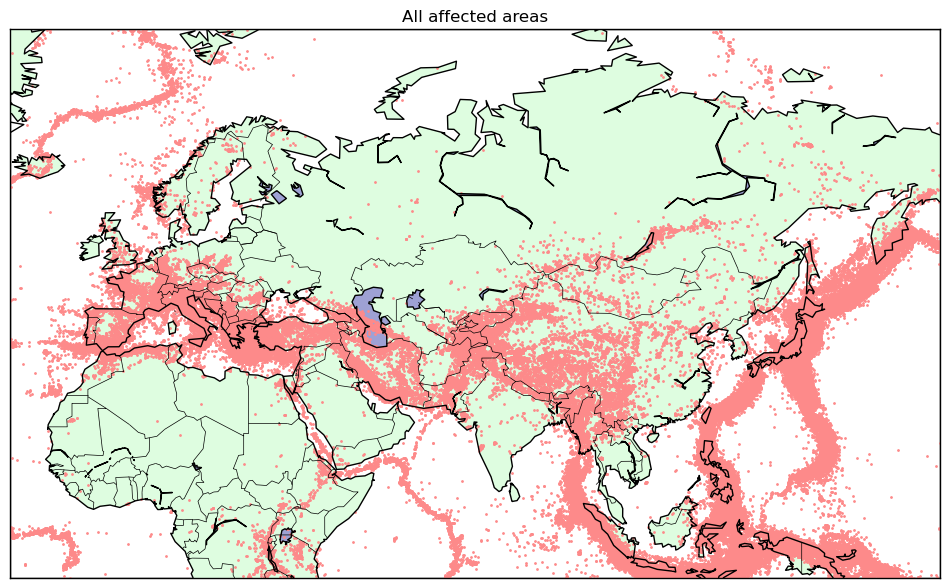

<Figure size 640x480 with 0 Axes>

In [10]:
# Visualizing Asia's Earthquake Data

from mpl_toolkits.basemap import Basemap

m = Basemap(projection='mill',llcrnrlat=-10,urcrnrlat=80, llcrnrlon=-25,urcrnrlon=170,lat_ts=20,resolution='c')

longitudes = data["longitude"].tolist()
latitudes = data["latitude"].tolist()
x,y = m(longitudes,latitudes)

fig = plt.figure(figsize=(12,10))
plt.title("All affected areas")
m.plot(x, y, "o", markersize = 1, color = '#fd8a8a')
m.drawcoastlines()
m.fillcontinents(color='#defde0',lake_color='#9ea1d4')
m.drawmapboundary()
m.drawcountries()
plt.show()
plt.savefig('map.png', dpi = 500)

In [11]:
# Converting Given Time Format to Standard Time Format
from datetime import datetime
data['standard_datetime'] = data['time'].apply(lambda x: datetime.strptime(x, "%Y-%m-%dT%H:%M:%S.%fZ").strftime("%Y-%m-%d %H:%M:%S"))
data

,time,latitude,longitude,mag,depth,standard_datetime
0,1930-12-08T08:01:02.000Z,23.2610,120.2770,6.3,15.00,1930-12-08 08:01:02
1,1930-12-03T18:51:47.000Z,18.2330,96.2980,7.4,10.00,1930-12-03 18:51:47
2,1930-12-02T07:01:30.000Z,25.8540,98.3560,6.2,35.00,1930-12-02 07:01:30
4,1930-11-25T19:02:53.000Z,35.0500,139.1290,6.9,15.00,1930-11-25 19:02:53
5,1930-11-10T13:44:15.000Z,-2.3350,138.7840,6.9,30.00,1930-11-10 13:44:15
...,...,...,...,...,...,...
797021,2018-09-01T07:24:34.520Z,32.7210,140.4162,4.4,126.83,2018-09-01 07:24:34
797023,2018-09-01T07:11:51.930Z,18.5664,145.8614,4.5,182.73,2018-09-01 07:11:51
797030,2018-09-01T05:31:11.970Z,34.3868,45.7902,4.4,10.00,2018-09-01 05:31:11
797043,2018-09-01T01:00:13.810Z,-5.5167,147.1735,4.6,217.56,2018-09-01 01:00:13


In [12]:
# Convert Time to Unix Format

data['standard_datetime'] = pd.to_datetime(data['standard_datetime'])

data['unix_time'] = data['standard_datetime'].apply(lambda x: x.timestamp())
data

,time,latitude,longitude,mag,depth,standard_datetime,unix_time
0,1930-12-08T08:01:02.000Z,23.2610,120.2770,6.3,15.00,1930-12-08 08:01:02,-1.232813e+09
1,1930-12-03T18:51:47.000Z,18.2330,96.2980,7.4,10.00,1930-12-03 18:51:47,-1.233206e+09
2,1930-12-02T07:01:30.000Z,25.8540,98.3560,6.2,35.00,1930-12-02 07:01:30,-1.233335e+09
4,1930-11-25T19:02:53.000Z,35.0500,139.1290,6.9,15.00,1930-11-25 19:02:53,-1.233896e+09
5,1930-11-10T13:44:15.000Z,-2.3350,138.7840,6.9,30.00,1930-11-10 13:44:15,-1.235211e+09
...,...,...,...,...,...,...,...
797021,2018-09-01T07:24:34.520Z,32.7210,140.4162,4.4,126.83,2018-09-01 07:24:34,1.535787e+09
797023,2018-09-01T07:11:51.930Z,18.5664,145.8614,4.5,182.73,2018-09-01 07:11:51,1.535786e+09
797030,2018-09-01T05:31:11.970Z,34.3868,45.7902,4.4,10.00,2018-09-01 05:31:11,1.535780e+09
797043,2018-09-01T01:00:13.810Z,-5.5167,147.1735,4.6,217.56,2018-09-01 01:00:13,1.535764e+09


In [13]:
# Extracting Feature Vector and Target Vector

X = data[['unix_time', 'latitude', 'longitude', 'depth']]
y = data['mag']
X,y

(           unix_time  latitude  longitude   depth
 0      -1.232813e+09   23.2610   120.2770   15.00
 1      -1.233206e+09   18.2330    96.2980   10.00
 2      -1.233335e+09   25.8540    98.3560   35.00
 4      -1.233896e+09   35.0500   139.1290   15.00
 5      -1.235211e+09   -2.3350   138.7840   30.00
 ...              ...       ...        ...     ...
 797021  1.535787e+09   32.7210   140.4162  126.83
 797023  1.535786e+09   18.5664   145.8614  182.73
 797030  1.535780e+09   34.3868    45.7902   10.00
 797043  1.535764e+09   -5.5167   147.1735  217.56
 797044  1.535762e+09   46.8819   155.6566   10.00
 
 [327785 rows x 4 columns],
 0         6.3
 1         7.4
 2         6.2
 4         6.9
 5         6.9
          ... 
 797021    4.4
 797023    4.5
 797030    4.4
 797043    4.6
 797044    4.3
 Name: mag, Length: 327785, dtype: float64)

In [14]:
# Scaling Data to the range [0,1]

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

X_scaled, y_scaled

(array([[0.00997467, 0.36956867, 0.74503169, 0.0246953 ],
        [0.00983467, 0.3137012 , 0.62204707, 0.01743198],
        [0.0097887 , 0.3983802 , 0.63260223, 0.0537486 ],
        ...,
        [0.99635802, 0.49319046, 0.36300029, 0.01743198],
        [0.99635223, 0.04981183, 0.88297972, 0.31894711],
        [0.99635153, 0.63202691, 0.92648824, 0.01743198]]),
 array([[0.57575758],
        [0.74242424],
        [0.56060606],
        ...,
        [0.28787879],
        [0.31818182],
        [0.27272727]]))

In [15]:
# Split Data into Testing, Training and Validation Sets
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")


inv_scaler = MinMaxScaler()
inv_scaler.fit(y_train)

Training data shape: (196671, 4)
Validation data shape: (65557, 4)
Test data shape: (65557, 4)


MinMaxScaler()

# Linear Regression

Validation MSE: 0.00837009777553963
Validation R^2: 0.4405856983010098
Test MSE: 0.008311361008688897
Test R^2: 0.44560983459275516


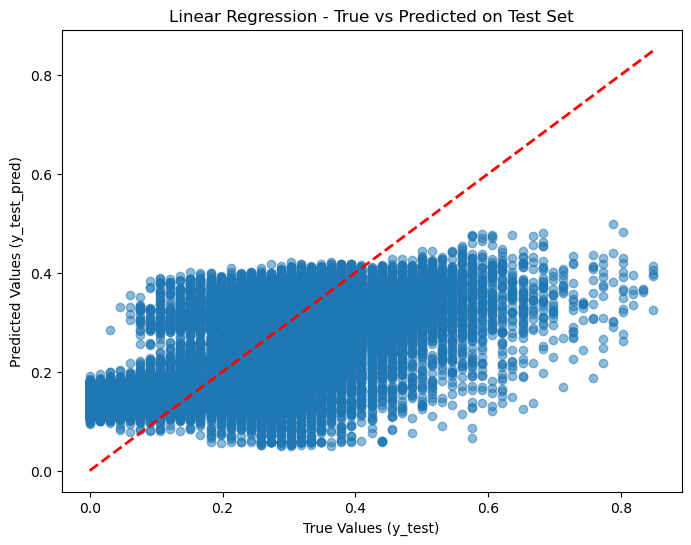

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

linreg = LinearRegression()

linreg.fit(X_train, y_train)

y_val_pred = linreg.predict(X_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE: {val_mse}")
print(f"Validation R^2: {val_r2}")

y_test_pred = linreg.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("Linear Regression - True vs Predicted on Test Set")
plt.show()

# Polynomial Regression

Validation MSE (Polynomial Regression): 0.0061102120718533395
Validation R^2 (Polynomial Regression): 0.5916248398677513
Test MSE (Polynomial Regression): 0.00602541444327293
Test R^2 (Polynomial Regression): 0.5980886275591789


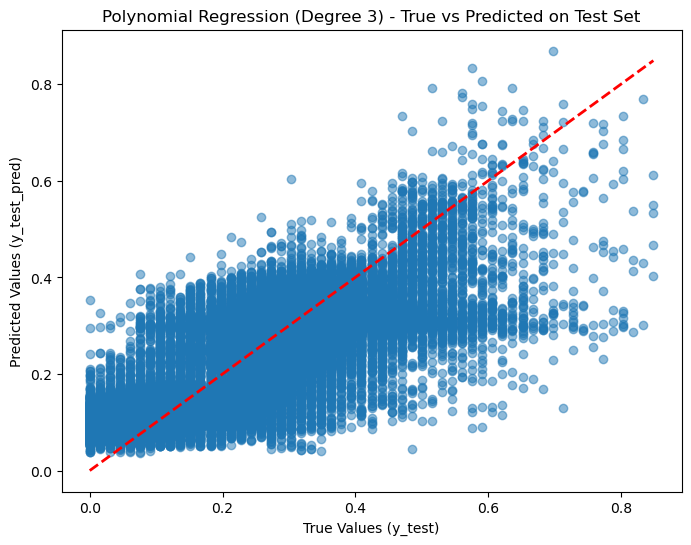

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

deg = 3
poly_features = PolynomialFeatures(degree=deg)

X_train_poly = poly_features.fit_transform(X_train)
X_val_poly = poly_features.transform(X_val)
X_test_poly = poly_features.transform(X_test)

poly_reg_model = LinearRegression()
poly_reg_model.fit(X_train_poly, y_train)


y_val_pred = poly_reg_model.predict(X_val_poly)
val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE (Polynomial Regression): {val_mse}")
print(f"Validation R^2 (Polynomial Regression): {val_r2}")


y_test_pred = poly_reg_model.predict(X_test_poly)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE (Polynomial Regression): {test_mse}")
print(f"Test R^2 (Polynomial Regression): {test_r2}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title(f"Polynomial Regression (Degree {deg}) - True vs Predicted on Test Set")
plt.show()

# Support Vector Regression

Validation MSE (SVR with RBF): 0.005758306138584951
Validation R^2 (SVR with RBF): 0.6151444231751726
Test MSE (SVR with RBF): 0.005718429268570433
Test R^2 (SVR with RBF): 0.6185653655570795


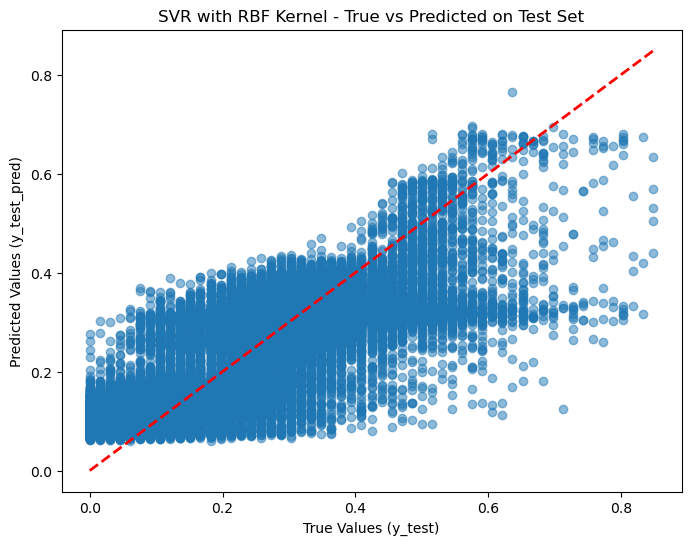

In [28]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')

svr_model.fit(X_train, y_train.ravel())

y_val_pred = svr_model.predict(X_val)


val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE (SVR with RBF): {val_mse}")
print(f"Validation R^2 (SVR with RBF): {val_r2}")


y_test_pred = svr_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE (SVR with RBF): {test_mse}")
print(f"Test R^2 (SVR with RBF): {test_r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("SVR with RBF Kernel - True vs Predicted on Test Set")
plt.show()

# Random Forest Regression

Validation MSE (Random Forest): 0.004359580772295397
Validation R^2 (Random Forest): 0.7086280353186507
Test MSE (Random Forest): 0.0043352999670467195
Test R^2 (Random Forest): 0.71082381534042


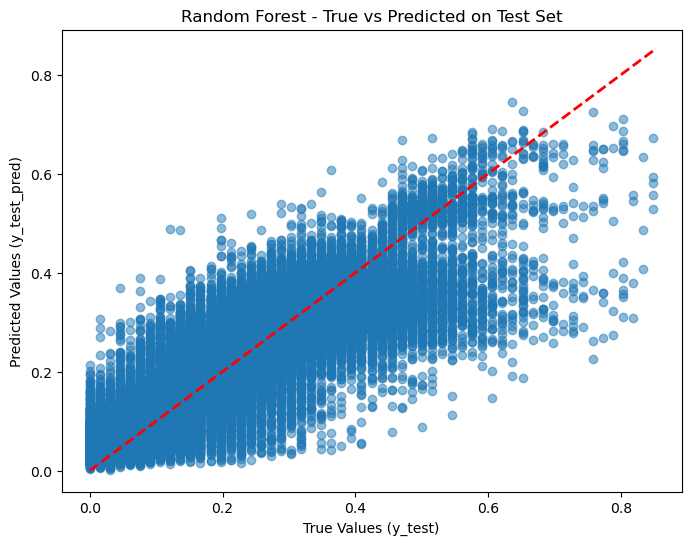

In [30]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train.ravel())

y_val_pred = rf_model.predict(X_val)

val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE (Random Forest): {val_mse}")
print(f"Validation R^2 (Random Forest): {val_r2}")

y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE (Random Forest): {test_mse}")
print(f"Test R^2 (Random Forest): {test_r2}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("Random Forest - True vs Predicted on Test Set")
plt.show()

# Artificial Neural Network

Validation MSE (ANN): 0.005318362614942756
Validation R^2 (ANN): 0.6445479863909469
Test MSE (ANN): 0.005295294774804974
Test R^2 (ANN): 0.6467895759773592


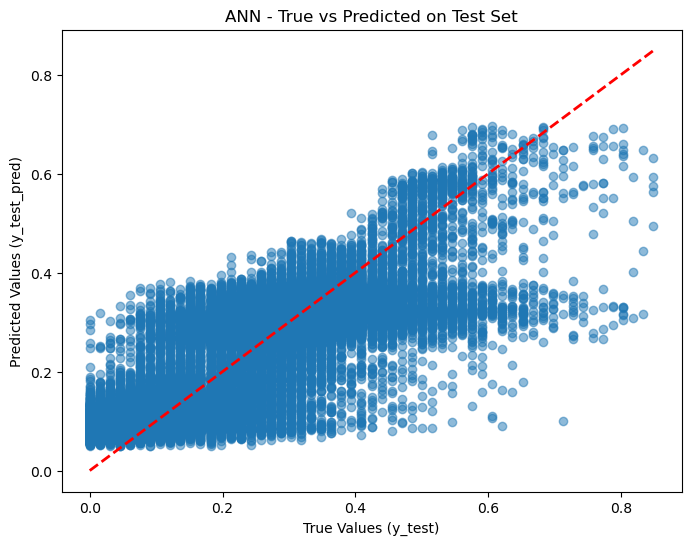

In [34]:
from sklearn.neural_network import MLPRegressor

ann_model = MLPRegressor(hidden_layer_sizes=(100, 50, 25), activation='relu', solver='adam', max_iter=1000, random_state=42)

ann_model.fit(X_train, y_train.ravel())

y_val_pred = ann_model.predict(X_val)


val_mse = mean_squared_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation MSE (ANN): {val_mse}")
print(f"Validation R^2 (ANN): {val_r2}")


y_test_pred = ann_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test MSE (ANN): {test_mse}")
print(f"Test R^2 (ANN): {test_r2}")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("True Values (y_test)")
plt.ylabel("Predicted Values (y_test_pred)")
plt.title("ANN - True vs Predicted on Test Set")
plt.show()

# Final Result:
| Model | MSE | R² |
|-------|-----|----|
| Linear Regression     | 0.008   | 0.445  |
| Polynomial Regression (Degree 3) | 0.006 | 0.598 |
| Support Vector Regression (RBF Kernel) | 0.006 | 0.618 |
| Random Forest Regression | 0.004 | 0.711 | 
| Artificial Neural Network | 0.005 | 0.647|
## Conclusion:
Among these models, **Random Forest Regression** has the best performance, with the lowest MSE (0.004) and highest  R² (0.711), making it the most suitable for this regression task. The significant improvement in performance with non-linear and ensemble models (Random Forest and ANN) suggests that the dataset contains complex patterns that linear models cannot fully capture. For applications prioritizing accuracy, **Random Forest** would be the best choice.